In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

In [2]:
df = pd.read_csv("Fifa-Market-Fixed.csv")

In [10]:
df.shape

(44864, 65)

In [11]:
len(pd.unique(df["Old_Club"]))

2249

In [12]:
df.columns

Index(['TransfermarktId', 'Name', 'Season_Name', 'Old_Club', 'New_Club',
       'Market_Value', 'player_positions', 'overall', 'potential', 'value_eur',
       'age', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'league_level', 'club_position', 'club_contract_valid_until_year',
       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,player_positions,overall,potential,value_eur,age,height_cm,weight_kg,club_name,league_name,league_level,club_position,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,226025,L. Mazzitelli,24,Monza,Frosinone,3000000,"CM, CDM",73.0,73.0,3200000.0,27.0,187.0,76.0,Frosinone,Serie A,1.0,CDM,2025.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,62.0,73.0,71.0,64.0,70.0,70.0,54.0,55.0,77.0,65.0,70.0,69.0,54.0,77.0,76.0,54.0,52.0,59.0,72.0,67.0,74.0,63.0,69.0,69.0,72.0,74.0,71.0,59.0,73.0,44.0,55.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
1,226025,L. Mazzitelli,23,Frosinone,Monza,3000000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
2,226025,L. Mazzitelli,23,Monza,Frosinone,2400000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
3,226025,L. Mazzitelli,21,AC Pisa,Sassuolo,2800000,"CM, CDM",70.0,75.0,2400000.0,24.0,187.0,76.0,Sassuolo,Serie A,1.0,RES,2022.0,27.0,Italy,Right,4.0,2.0,1.0,Medium/Medium,Normal (185+),56.0,55.0,70.0,70.0,63.0,63.0,68.0,40.0,60.0,74.0,65.0,69.0,66.0,45.0,73.0,74.0,60.0,52.0,61.0,68.0,66.0,72.0,61.0,64.0,60.0,70.0,70.0,68.0,63.0,72.0,44.0,56.0,68.0,66.0,12.0,7.0,8.0,8.0,10.0
4,226025,L. Mazzitelli,21,Sassuolo,AC Pisa,2500000,"CM, CDM",70.0,75.0,2400000.0,24.0,187.0,76.0,Sassuolo,Serie A,1.0,RES,2022.0,27.0,Italy,Right,4.0,2.0,1.0,Medium/Medium,Normal (185+),56.0,55.0,70.0,70.0,63.0,63.0,68.0,40.0,60.0,74.0,65.0,69.0,66.0,45.0,73.0,74.0,60.0,52.0,61.0,68.0,66.0,72.0,61.0,64.0,60.0,70.0,70.0,68.0,63.0,72.0,44.0,56.0,68.0,66.0,12.0,7.0,8.0,8.0,10.0


In [3]:
def map_first_word(value,index):
    first_word = value.split('/')[index]  # Extract the first word
    if first_word == 'High':
        return 3
    elif first_word == 'Medium':
        return 2
    elif first_word == 'Low':
        return 1
    else:
        return None  # Handle unexpected cases

# Apply the mapping function to create a new column
df['attack_work_rate'] = df['work_rate'].apply(lambda x: map_first_word(x, 0))  # First part
df['defense_work_rate'] = df['work_rate'].apply(lambda x: map_first_word(x, 1))
df = df.drop("work_rate",axis=1)

In [4]:
df.select_dtypes(include= ["float64","int64"]).columns

Index(['TransfermarktId', 'Season_Name', 'Market_Value', 'overall',
       'potential', 'value_eur', 'age', 'height_cm', 'weight_kg',
       'league_level', 'club_contract_valid_until_year', 'nationality_id',
       'weak_foot', 'skill_moves', 'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defendi

In [5]:
columns_not_normalize = ['TransfermarktId', 'Season_Name', 'Market_Value',"club_contract_valid_until_year","nationality_name"]
# Nationality ID is included in normalizing columns since it is used in prediciton

In [6]:
pd.unique(df["nationality_id"])

array([ 27.,  45.,  18., 118.,  34.,  39.,  38.,  43., 136.,  52.,  48.,
        60.,  37., 108.,  82.,  14.,   3.,  22.,  51.,  47.,  21.,  30.,
       129.,  54.,  46.,  55.,  56.,  24.,   7.,  83.,  58., 198.,  50.,
       133.,  61.,  95.,  25.,  42.,  36., 219., 145., 115.,  59., 110.,
       195., 117.,  13.,  10.,  26.,  97., 111., 101., 130., 163.,  85.,
         1.,  49.,  12.,  15.,  40.,  72., 104., 126., 208., 128.,  57.,
       183., 144., 103., 140.,  99.,   4., 116.,  53.,  11., 161., 135.,
       138., 147., 207., 191., 105., 127.,  70.,   9.,  19., 112.,  33.,
        44.,  98.,  92.,  35.,   6., 162.,  17.,  93., 148., 107., 119.,
        87.,  29.,   8.,  31.,  23., 102., 106., 215.,   5., 124., 120.,
        20.,  84., 186.,  66.,  28.,  76.,  80.,  81., 113.,  89.,  68.,
        32., 197., 159.,  64.,  79., 123., 214.,  86., 165.,  16., 122.,
       181., 182., 180., 139., 205., 179., 146., 171.,  90., 143.,  77.,
        63., 164.])

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
import joblib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [8]:
df_low_dim = pd.read_csv("Processed_Data_Lower_Dim_Fixed.csv")
X_lowdim = df_low_dim.drop(["Market_Value","TransfermarktId","Name","Season_Name","club_contract_valid_until_year","nationality_id","nationality_name","value_eur","Old_Club","New_Club","club_name","body_type"], axis=1)  
y_lowdim = df_low_dim['Market_Value']  
X_train,X_test, y_train, y_test = train_test_split(X_lowdim, y_lowdim, test_size=0.2, random_state=30)  # 40% for temp

Explained variance ratio by each principal component:
[0.14880883 0.08614601 0.06459255 0.05552192 0.04359503 0.03159931
 0.02928235 0.02382764 0.0222005  0.01809851 0.01745109 0.01675884
 0.01530961 0.01439034 0.0140534  0.01375    0.01361296 0.01306626
 0.01256225 0.01170748 0.01135635 0.01095803 0.00999732 0.00964622
 0.00918087 0.00874553 0.00851657 0.00826198 0.00808028 0.00793848
 0.00773869 0.00745639 0.00733639 0.00684105 0.00672031 0.00647621
 0.00632241 0.00623006 0.00607357 0.00596327 0.00587316 0.00560465
 0.00543245 0.00520552 0.00511847 0.00506818 0.00487772 0.00478572
 0.00469971 0.00463562 0.00446817 0.00427804 0.00419087 0.00416103
 0.00398338 0.00375304 0.00367838 0.00357605 0.00334184 0.00331431
 0.00315938 0.00297178 0.00290474 0.00285797 0.00274975 0.00271754
 0.00257843 0.00252806 0.00248381 0.00237599 0.00230097 0.00223896
 0.00210613 0.00206653 0.00199163 0.00195126 0.00187442 0.00185419
 0.00176113 0.00174825 0.00170565 0.00165239 0.00162617 0.00149021
 0.00148

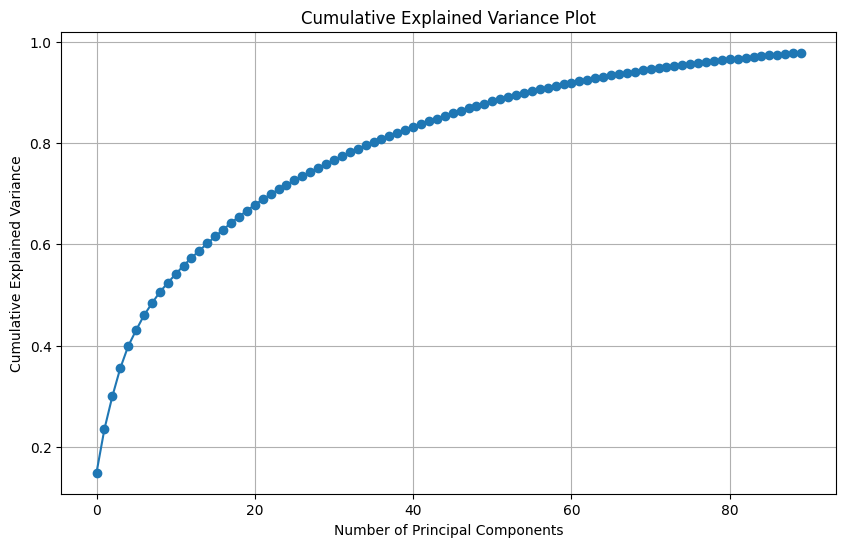

In [9]:
n_components = 90  # Number of components to keep
pca = PCA(n_components=n_components)

# Step 3: Fit PCA on the scaled data and transform
X_pca = pca.fit_transform(X_lowdim)

# Step 4: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

# Visualize how much variance is explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.savefig("Cum_var")
plt.grid()
plt.show()


In [10]:
columns_to_normalize = [i for i in df.select_dtypes(include= ["float64","int64"]).columns if i not in columns_not_normalize]

scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [11]:
df.head()

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,player_positions,overall,potential,value_eur,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,attack_work_rate,defense_work_rate
0,226025,L. Mazzitelli,24,Monza,Frosinone,3000000,"CM, CDM",0.571429,0.533333,0.024673,...,0.5625,0.7375,0.691358,0.323529,0.1875,0.175,0.21875,0.25,0.5,0.5
1,226025,L. Mazzitelli,23,Frosinone,Monza,3000000,"CM, CDM",0.530612,0.555556,0.018495,...,0.5375,0.7375,0.691358,0.323529,0.1875,0.175,0.21875,0.25,0.5,0.5
2,226025,L. Mazzitelli,23,Monza,Frosinone,2400000,"CM, CDM",0.530612,0.555556,0.018495,...,0.5375,0.7375,0.691358,0.323529,0.1875,0.175,0.21875,0.25,0.5,0.5
3,226025,L. Mazzitelli,21,AC Pisa,Sassuolo,2800000,"CM, CDM",0.510204,0.577778,0.018495,...,0.5750,0.7250,0.691358,0.323529,0.1875,0.175,0.21875,0.25,0.5,0.5
4,226025,L. Mazzitelli,21,Sassuolo,AC Pisa,2500000,"CM, CDM",0.510204,0.577778,0.018495,...,0.5750,0.7250,0.691358,0.323529,0.1875,0.175,0.21875,0.25,0.5,0.5


In [12]:
print(pd.unique(df["player_positions"]))

['CM, CDM' 'CM' 'LB, LW' 'RB' 'RB, RWB' 'RB, RW, LW' 'CB' 'CAM, LM, CM'
 'CAM, LW, CM' 'CB, LB' 'ST, LM' 'CAM, CM' 'CAM, CF, CM' 'CM, CAM, CF'
 'LW, RW' 'LW, CAM' 'LM' 'LM, RM' 'CM, CDM, CAM' 'CAM, CM, CDM' 'CDM, CAM'
 'CDM, CM' 'CDM' 'LB, RB, RWB' 'LWB, LB, RB' 'LWB, LB, RB, RWB' 'ST'
 'ST, CF' 'ST, CAM' 'ST, RM' 'RB, CB, RM' 'LW, RW, CAM' 'LM, LW'
 'LM, RM, LW' 'RB, CB' 'RB, RM' 'RW' 'RM, LM' 'RW, RM' 'CB, CDM' 'CB, RB'
 'CAM' 'RB, RM, CB' 'CAM, CM, LM' 'LM, LW, RW' 'LW' 'CF, LM, ST' 'LM, ST'
 'CM, RM' 'LB' 'LB, CB' 'CM, CAM, CDM' 'ST, LW' 'ST, RW' 'RM, LM, LW, RW'
 'CM, RW, CAM' 'RM, RB, LB' 'RM, RB' 'CM, RM, LM' 'RW, LW' 'RM, LM, RW'
 'LB, LM, CB' 'LM, RW, LW' 'RM, RW' 'LB, LM' 'LB, LWB, LM' 'LM, CAM, CM'
 'LM, CM' 'CM, CAM' 'LM, RM, CAM' 'CM, RB' 'RM, LM, ST' 'CAM, ST'
 'RM, ST, LM' 'LB, LWB' 'CF, ST' 'CF' 'CM, LM' 'RM, CM' 'LM, LW, RM'
 'CDM, RB' 'RWB, RB, RM' 'RB, LB' 'CAM, CM, LM, RM' 'LM, RM, CM, CAM'
 'CAM, RW, LW, CF' 'CDM, CB' 'CDM, CM, CB' 'LWB, LM' 'LM, LW, LWB'
 'LW, LM'

In [13]:
unique_attributes = set(attr.strip() for row in pd.unique(df['player_positions']) for attr in row.split(','))
unique_attributes

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST'}

In [14]:
for attr in unique_attributes:
    df[attr] = df['player_positions'].apply(lambda x: int(attr in x.split(',')))

In [15]:
df = df.drop("player_positions",axis= 1)
df.head()

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,overall,potential,value_eur,age,...,LWB,CAM,CF,RWB,CB,RB,CM,RM,LW,LM
0,226025,L. Mazzitelli,24,Monza,Frosinone,3000000,0.571429,0.533333,0.024673,0.478261,...,0,0,0,0,0,0,1,0,0,0
1,226025,L. Mazzitelli,23,Frosinone,Monza,3000000,0.530612,0.555556,0.018495,0.434783,...,0,0,0,0,0,0,1,0,0,0
2,226025,L. Mazzitelli,23,Monza,Frosinone,2400000,0.530612,0.555556,0.018495,0.434783,...,0,0,0,0,0,0,1,0,0,0
3,226025,L. Mazzitelli,21,AC Pisa,Sassuolo,2800000,0.510204,0.577778,0.018495,0.347826,...,0,0,0,0,0,0,1,0,0,0
4,226025,L. Mazzitelli,21,Sassuolo,AC Pisa,2500000,0.510204,0.577778,0.018495,0.347826,...,0,0,0,0,0,0,1,0,0,0


In [16]:
df.columns

Index(['TransfermarktId', 'Name', 'Season_Name', 'Old_Club', 'New_Club',
       'Market_Value', 'overall', 'potential', 'value_eur', 'age', 'height_cm',
       'weight_kg', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_contract_valid_until_year', 'nationality_id',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'body_type', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_in

In [17]:
pd.reset_option('display.max_columns')


In [18]:
for col, count in df.select_dtypes(exclude=["float64","int32"]).nunique().items():
    print(f"{col}: {count}")

TransfermarktId: 8114
Name: 7884
Season_Name: 10
Old_Club: 2249
New_Club: 2246
Market_Value: 164
club_name: 1038
league_name: 42
club_position: 28
nationality_name: 145
preferred_foot: 2
body_type: 10
RW: 2
LB: 2
ST: 2
CDM: 2
LWB: 2
CAM: 2
CF: 2
RWB: 2
CB: 2
RB: 2
CM: 2
RM: 2
LW: 2
LM: 2


In [19]:
num_data = df.select_dtypes(include=["float64","int64"])
num_data.columns

Index(['TransfermarktId', 'Season_Name', 'Market_Value', 'overall',
       'potential', 'value_eur', 'age', 'height_cm', 'weight_kg',
       'league_level', 'club_contract_valid_until_year', 'nationality_id',
       'weak_foot', 'skill_moves', 'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defendi

In [20]:
num_data.drop(["value_eur","club_contract_valid_until_year","nationality_id",'TransfermarktId', 'Season_Name'],axis=1).to_csv("Processed_Data_Only_Numerical.csv",index=False)

In [21]:
non_numeric_cols = df.select_dtypes(exclude=["float64","int64"]).columns
non_numeric_cols

Index(['Name', 'Old_Club', 'New_Club', 'club_name', 'league_name',
       'club_position', 'nationality_name', 'preferred_foot', 'body_type'],
      dtype='object')

In [22]:
df["Market_Value"].dtype

dtype('int64')

In [23]:
non_numeric_cols = non_numeric_cols.drop(["Name","nationality_name",'Old_Club', 'New_Club', 'club_name',"body_type"])
non_numeric_cols

Index(['league_name', 'club_position', 'preferred_foot'], dtype='object')

In [24]:
df_encoded = pd.get_dummies(df, columns=non_numeric_cols,drop_first=True,dtype=int)
df_encoded.head()

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,overall,potential,value_eur,age,...,club_position_RDM,club_position_RES,club_position_RF,club_position_RM,club_position_RS,club_position_RW,club_position_RWB,club_position_ST,club_position_SUB,preferred_foot_Right
0,226025,L. Mazzitelli,24,Monza,Frosinone,3000000,0.571429,0.533333,0.024673,0.478261,...,0,0,0,0,0,0,0,0,0,1
1,226025,L. Mazzitelli,23,Frosinone,Monza,3000000,0.530612,0.555556,0.018495,0.434783,...,0,0,0,0,0,0,0,0,1,1
2,226025,L. Mazzitelli,23,Monza,Frosinone,2400000,0.530612,0.555556,0.018495,0.434783,...,0,0,0,0,0,0,0,0,1,1
3,226025,L. Mazzitelli,21,AC Pisa,Sassuolo,2800000,0.510204,0.577778,0.018495,0.347826,...,0,1,0,0,0,0,0,0,0,1
4,226025,L. Mazzitelli,21,Sassuolo,AC Pisa,2500000,0.510204,0.577778,0.018495,0.347826,...,0,1,0,0,0,0,0,0,0,1


In [25]:
df_encoded.dtypes

TransfermarktId          int64
Name                    object
Season_Name              int64
Old_Club                object
New_Club                object
                         ...  
club_position_RW         int64
club_position_RWB        int64
club_position_ST         int64
club_position_SUB        int64
preferred_foot_Right     int64
Length: 145, dtype: object

In [26]:
print(df_encoded.head())

   TransfermarktId           Name  Season_Name   Old_Club   New_Club  \
0           226025  L. Mazzitelli           24      Monza  Frosinone   
1           226025  L. Mazzitelli           23  Frosinone      Monza   
2           226025  L. Mazzitelli           23      Monza  Frosinone   
3           226025  L. Mazzitelli           21    AC Pisa   Sassuolo   
4           226025  L. Mazzitelli           21   Sassuolo    AC Pisa   

   Market_Value   overall  potential  value_eur       age  ...  \
0       3000000  0.571429   0.533333   0.024673  0.478261  ...   
1       3000000  0.530612   0.555556   0.018495  0.434783  ...   
2       2400000  0.530612   0.555556   0.018495  0.434783  ...   
3       2800000  0.510204   0.577778   0.018495  0.347826  ...   
4       2500000  0.510204   0.577778   0.018495  0.347826  ...   

   club_position_RDM  club_position_RES club_position_RF  club_position_RM  \
0                  0                  0                0                 0   
1             

In [27]:
df_encoded.to_csv("Processed_Data_Lower_Dim_Fixed.csv",index = False)